In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# Load the dataset
data = pd.read_csv('D:/Ph.D Work/Ph.D Work Related/Datasets/agriculture.csv')
data


,PID,Date,N,P,K,MaxT,MinT,WindSpeed,Humidity,Precipitation,rainfall,Season,Crop,Production,Production Units,Yield
0,120001,08-01-2006 00:00,90,42,43,29.5,21.8,1.6,70.2,0.0,202.935536,Kharif,Arhar/Tur,430.0,Tonnes,1.673152
1,120002,09-01-2006 00:00,85,58,41,30.1,21.0,1.6,67.4,0.0,226.655537,Kharif,Bajra,379.0,Tonnes,1.441065
2,120003,10-01-2006 00:00,60,55,44,29.9,21.1,1.7,65.2,0.0,263.964248,Kharif,Castor seed,189.0,Tonnes,0.710526
3,120004,11-01-2006 00:00,74,35,40,29.8,20.8,1.5,69.0,0.0,242.864034,Kharif,Cotton(lint),12.0,Tonnes,1.714286
4,120005,12-01-2006 00:00,78,42,42,29.6,20.5,2.1,69.5,0.0,262.717340,Kharif,Dry chillies,10.0,Tonnes,1.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6337,126338,16-05-2023 00:00,111,17,30,37.0,17.0,4.0,23.0,0.0,141.000000,Whole Year,Turmeric,10.0,Tonnes,0.250000
6338,126339,17-05-2023 00:00,117,23,29,35.0,20.0,2.0,38.0,0.0,161.000000,Kharif,Arhar/Tur,37.0,Tonnes,0.397849
6339,126340,18-05-2023 00:00,112,21,31,38.0,17.0,4.0,44.0,0.0,189.000000,Kharif,Bajra,5000.0,Tonnes,0.416667
6340,126341,19-05-2023 00:00,108,40,31,37.0,18.0,4.0,66.0,0.0,169.000000,Kharif,Castor seed,2000.0,Tonnes,1.000000


In [2]:
# Preprocess the data
# Drop irrelevant columns
data = data.drop(["PID", "Date"], axis=1)

# Separate input features and target variable
X = data.drop("Crop", axis=1)
y = data["Crop"]

# Convert "Season" column to numeric using label encoding
season_label_encoder = LabelEncoder()
X["Season"] = season_label_encoder.fit_transform(X["Season"])

# Split numeric and non-numeric columns
numeric_columns = X.select_dtypes(include="number").columns
non_numeric_columns = X.select_dtypes(exclude="number").columns

# Define preprocessing steps
numeric_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="mean"))
])

non_numeric_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder())
])

preprocessor = ColumnTransformer([
    ("numeric", numeric_transformer, numeric_columns),
    ("non_numeric", non_numeric_transformer, non_numeric_columns)
])



In [3]:
# Encode target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define classification algorithms
classifiers = [
    ("Logistic Regression", LogisticRegression()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier()),
    ("Support Vector Machine", SVC()),
    ("Naive Bayes", GaussianNB()),
    ("K-Nearest Neighbors", KNeighborsClassifier())
]



In [4]:
# Train and evaluate the models
for name, classifier in classifiers:
    model = Pipeline([
        ("preprocessor", preprocessor),
        ("classifier", classifier)
    ])
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"Classification Report for {name}:")
    print(classification_report(y_test, y_pred))
    print("-----------------------------------------")


C:\Users\Srikanth.Mandela\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Srikanth.Mandela\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Srikanth.Mandela\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.00      0.00      0.00        52
           2       0.00      0.00      0.00        44
           3       0.00      0.00      0.00        18
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         9
           8       0.00      0.00      0.00         5
           9       0.00      0.00      0.00        12
          10       0.00      0.00      0.00        34
          11       0.00      0.00      0.00         4
          12       0.00      0.00      0.00        21
          13       0.00      0.00      0.00        15
          14       0.00      0.00      0.00        28
          15       0.00      0.00      0.00         8
          16       0.00      0.00 

C:\Users\Srikanth.Mandela\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Srikanth.Mandela\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Srikanth.Mandela\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Srikanth.Mandela\anac

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.02      0.02      0.02        52
           2       0.04      0.05      0.04        44
           3       0.04      0.06      0.04        18
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         9
           8       0.00      0.00      0.00         5
           9       0.00      0.00      0.00        12
          10       0.00      0.00      0.00        34
          11       0.00      0.00      0.00         4
          12       0.00      0.00      0.00        21
          13       0.12      0.13      0.12        15
          14       0.03      0.04      0.03        28
          15       0.00      0.00      0.00         8
          16       0.00      0.00      0

C:\Users\Srikanth.Mandela\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Srikanth.Mandela\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Srikanth.Mandela\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report for Support Vector Machine:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.00      0.00      0.00        52
           2       0.00      0.00      0.00        44
           3       0.00      0.00      0.00        18
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         9
           8       0.00      0.00      0.00         5
           9       0.00      0.00      0.00        12
          10       0.00      0.00      0.00        34
          11       0.00      0.00      0.00         4
          12       0.00      0.00      0.00        21
          13       0.00      0.00      0.00        15
          14       0.00      0.00      0.00        28
          15       0.00      0.00      0.00         8
          16       0.00      0.

C:\Users\Srikanth.Mandela\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Srikanth.Mandela\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Srikanth.Mandela\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Srikanth.Mand

Classification Report for K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.03      0.12      0.05        52
           2       0.01      0.02      0.01        44
           3       0.02      0.06      0.02        18
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         9
           8       0.00      0.00      0.00         5
           9       0.00      0.00      0.00        12
          10       0.04      0.09      0.05        34
          11       0.00      0.00      0.00         4
          12       0.02      0.05      0.03        21
          13       0.00      0.00      0.00        15
          14       0.03      0.07      0.04        28
          15       0.00      0.00      0.00         8
          16       0.00      0.00 

C:\Users\Srikanth.Mandela\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Srikanth.Mandela\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Srikanth.Mandela\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning

C:\Users\Srikanth.Mandela\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Srikanth.Mandela\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Srikanth.Mandela\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.00      0.00      0.00        52
           2       0.00      0.00      0.00        44
           3       0.00      0.00      0.00        18
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         9
           8       0.00      0.00      0.00         5
           9       0.00      0.00      0.00        12
          10       0.00      0.00      0.00        34
          11       0.00      0.00      0.00         4
          12       0.00      0.00      0.00        21
          13       0.00      0.00      0.00        15
          14       0.00      0.00      0.00        28
          15       0.00      0.00      0.00         8
          16       0.00      0.00 

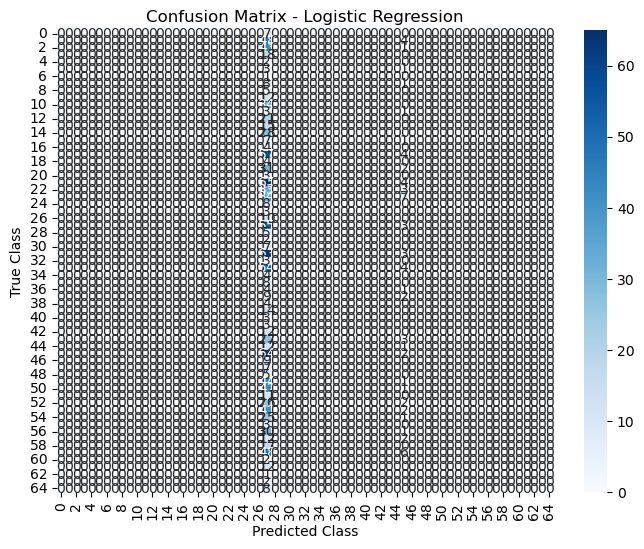

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.07      0.06      0.06        52
           2       0.05      0.05      0.05        44
           3       0.18      0.11      0.14        18
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         9
           8       0.00      0.00      0.00         5
           9       0.00      0.00      0.00        12
          10       0.00      0.00      0.00        34
          11       0.00      0.00      0.00         4
          12       0.04      0.05      0.04        21
          13       0.07      0.13      0.09        15
          14       0.00      0.00      0.00        28
          15       0.00      0.00      0.00         8
          16       0.00      0.00      0

C:\Users\Srikanth.Mandela\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Srikanth.Mandela\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Srikanth.Mandela\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Srikanth.Mandela\anac

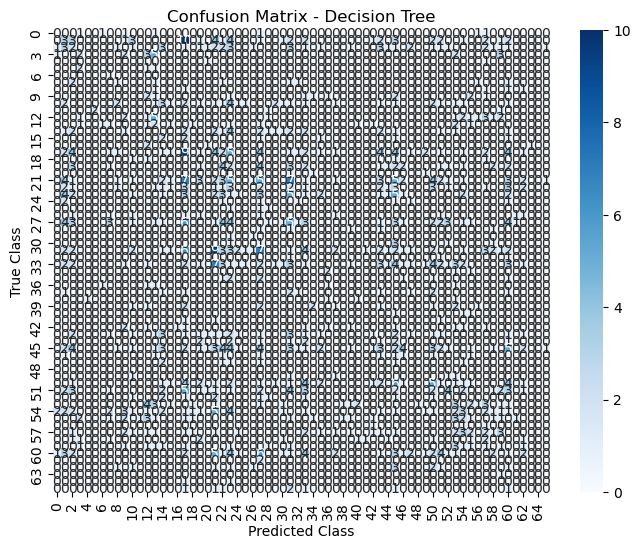

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.00      0.00      0.00        52
           2       0.03      0.05      0.04        44
           3       0.05      0.06      0.05        18
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         9
           8       0.00      0.00      0.00         5
           9       0.00      0.00      0.00        12
          10       0.07      0.06      0.07        34
          11       0.00      0.00      0.00         4
          12       0.03      0.05      0.04        21
          13       0.00      0.00      0.00        15
          14       0.03      0.04      0.03        28
          15       0.00      0.00      0.00         8
          16       0.00      0.00      0

C:\Users\Srikanth.Mandela\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Srikanth.Mandela\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Srikanth.Mandela\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


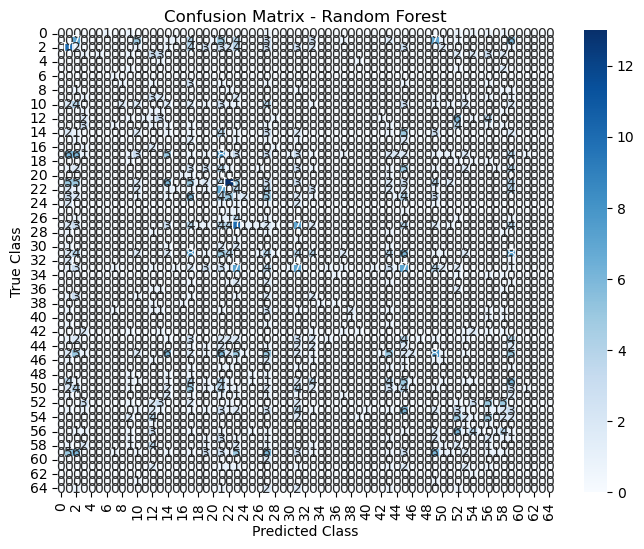

Classification Report for Support Vector Machine:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.00      0.00      0.00        52
           2       0.00      0.00      0.00        44
           3       0.00      0.00      0.00        18
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         9
           8       0.00      0.00      0.00         5
           9       0.00      0.00      0.00        12
          10       0.00      0.00      0.00        34
          11       0.00      0.00      0.00         4
          12       0.00      0.00      0.00        21
          13       0.00      0.00      0.00        15
          14       0.00      0.00      0.00        28
          15       0.00      0.00      0.00         8
          16       0.00      0.

C:\Users\Srikanth.Mandela\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Srikanth.Mandela\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Srikanth.Mandela\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


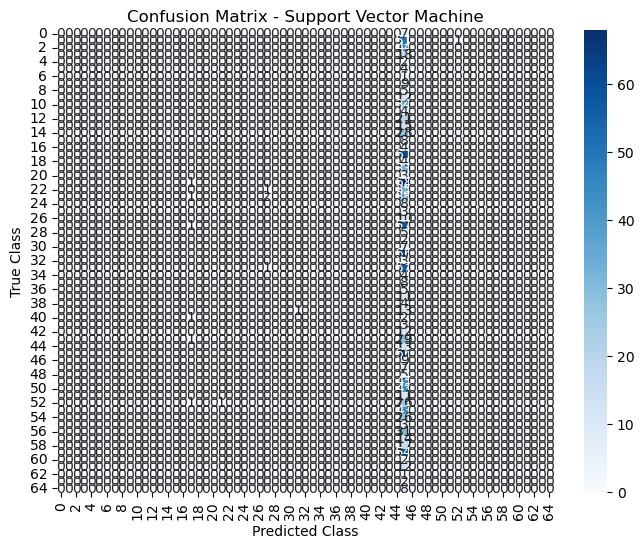

Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.00      0.00      0.00        52
           2       0.00      0.00      0.00        44
           3       0.00      0.00      0.00        18
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         9
           8       0.00      0.00      0.00         5
           9       0.00      0.00      0.00        12
          10       0.00      0.00      0.00        34
          11       0.00      0.00      0.00         4
          12       0.00      0.00      0.00        21
          13       0.00      0.00      0.00        15
          14       0.00      0.00      0.00        28
          15       0.00      0.00      0.00         8
          16       0.00      0.00      0.0

C:\Users\Srikanth.Mandela\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Srikanth.Mandela\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Srikanth.Mandela\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Srikanth.Mandela\anac

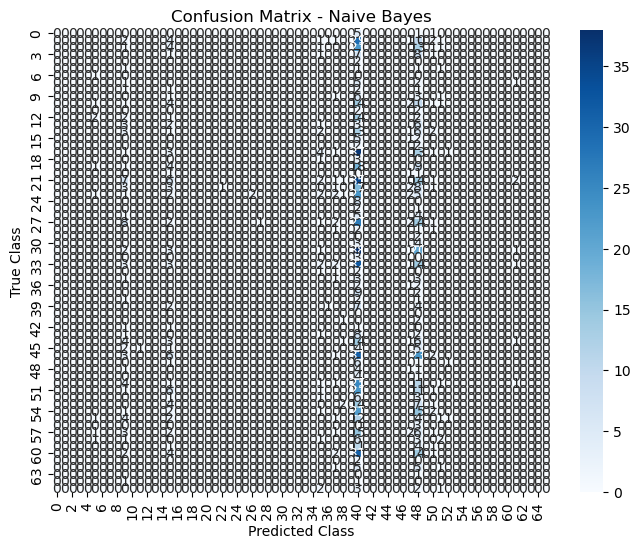

C:\Users\Srikanth.Mandela\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Srikanth.Mandela\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Srikanth.Mandela\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning

Classification Report for K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.03      0.12      0.05        52
           2       0.01      0.02      0.01        44
           3       0.02      0.06      0.02        18
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         9
           8       0.00      0.00      0.00         5
           9       0.00      0.00      0.00        12
          10       0.04      0.09      0.05        34
          11       0.00      0.00      0.00         4
          12       0.02      0.05      0.03        21
          13       0.00      0.00      0.00        15
          14       0.03      0.07      0.04        28
          15       0.00      0.00      0.00         8
          16       0.00      0.00 

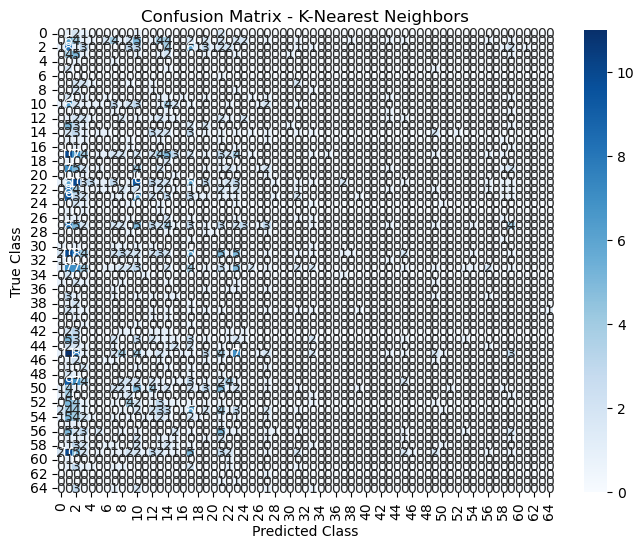

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# ...

# Train and evaluate the models
for name, classifier in classifiers:
    model = Pipeline([
        ("preprocessor", preprocessor),
        ("classifier", classifier)
    ])
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"Classification Report for {name}:")
    print(classification_report(y_test, y_pred))
    print("-----------------------------------------")
    
    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted Class")
    plt.ylabel("True Class")
    plt.show()


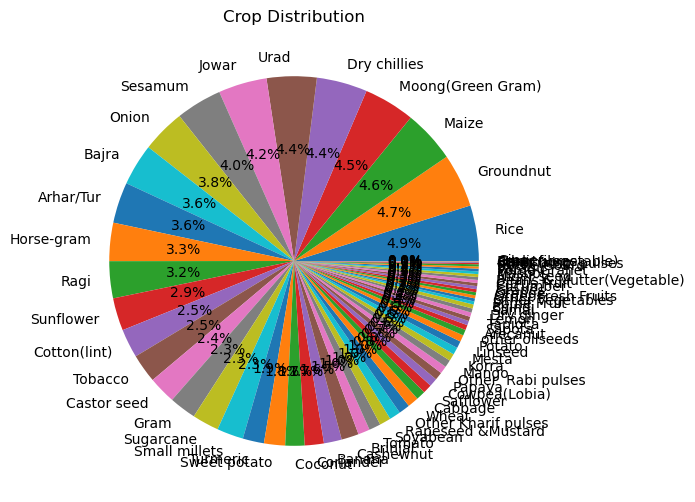

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# ...

# Pie chart
plt.figure(figsize=(8, 6))
data["Crop"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.title("Crop Distribution")
plt.ylabel("")
plt.show()



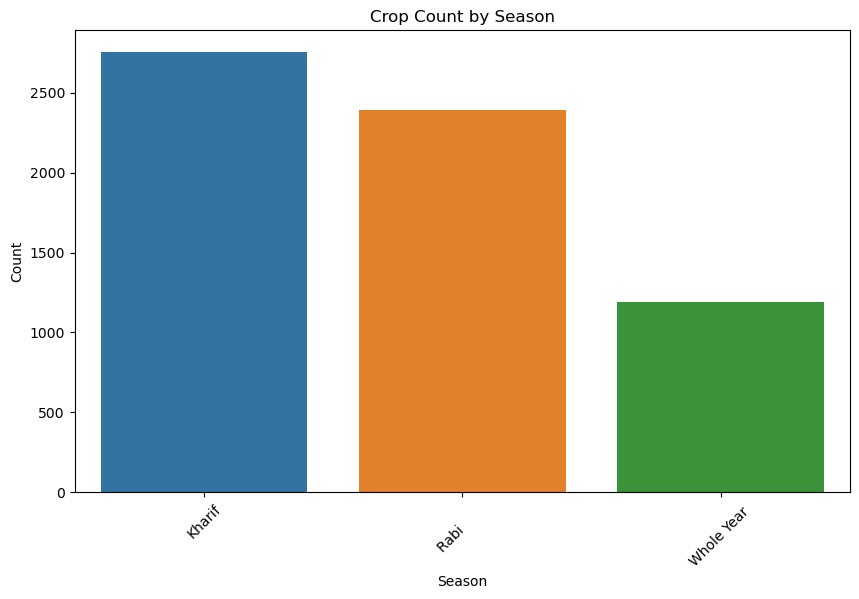

In [7]:
# Bar chart
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x="Season")
plt.title("Crop Count by Season")
plt.xlabel("Season")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


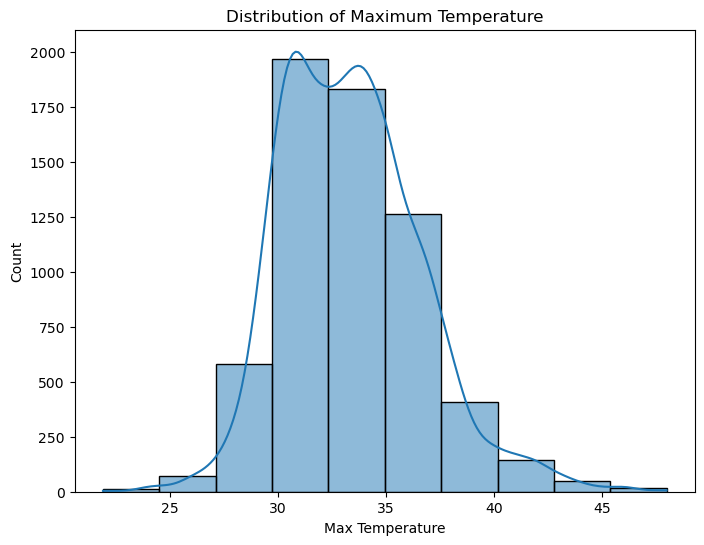

In [8]:

# Histogram
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x="MaxT", bins=10, kde=True)
plt.title("Distribution of Maximum Temperature")
plt.xlabel("Max Temperature")
plt.ylabel("Count")
plt.show()
